# calculate Indian Ocean dipole index


In [45]:
%matplotlib inline
from matplotlib import pyplot as plt

In [46]:
import numpy as np
import pandas as pd
from scipy.stats import zscore

In [47]:
import xarray as xr

In [48]:
from paleopy import indices

### parameters 

In [90]:
ipath = '/media/nicolasf/END19101/data/PICT/datasets/ERSST/ERSST_monthly_SST_1948_2021.nc'
opath = '/media/nicolasf/END19101/data/PICT/datasets/Indices/IOD_1948_2021_1981_2010_Clim.csv'
clim_start = '1981'
clim_end = '2010'

In [49]:
dset = xr.open_dataset(ipath)

In [50]:
dset = dset.sortby('latitudes')

### get the IOD nodes 

In [51]:
sub = indices.calculates_IOD_nodes(dset, lon_name='longitudes', lat_name='latitudes', IOD_node='all')

In [52]:
sub

<xarray.Dataset>
Dimensions:  (IOD: 2, time: 888)
Coordinates:
  * IOD      (IOD) object 'IOD_West' 'IOD_East'
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2021-12-01
Data variables:
    sst      (IOD, time) float32 27.31 27.75 28.44 29.05 ... 28.76 28.87 29.0
    mask     (IOD) float32 0.008264 0.09091

<AxesSubplot:xlabel='time'>

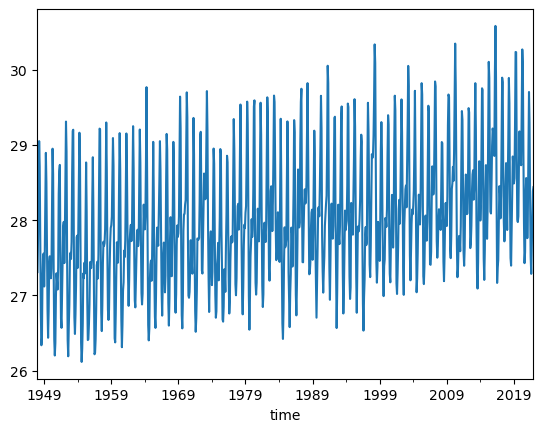

In [53]:
sub.sel(IOD='IOD_West').to_pandas()['sst'].plot()

<AxesSubplot:xlabel='time'>

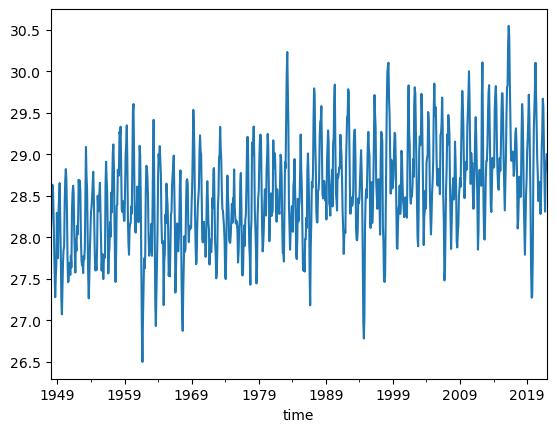

In [54]:
sub.sel(IOD='IOD_East').to_pandas()['sst'].plot()

### subtract the seasonal cycle 

In [55]:
def demean(x): 
    return x - x.sel(time=slice(clim_start, clim_end)).mean('time')

In [56]:
IOD_anoms = sub['sst'].groupby('time.month').apply(demean)

In [57]:
IOD_anoms

<xarray.DataArray 'sst' (IOD: 2, time: 888)>
array([[-0.59614944, -0.41006088, -0.44262505, ...,  0.16847038,
         0.20469666,  0.348938  ],
       [-0.553339  , -0.5459366 , -0.6434784 , ...,  0.53240585,
         0.43640327,  0.4945221 ]], dtype=float32)
Coordinates:
  * IOD      (IOD) object 'IOD_West' 'IOD_East'
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2021-12-01

<AxesSubplot:xlabel='time'>

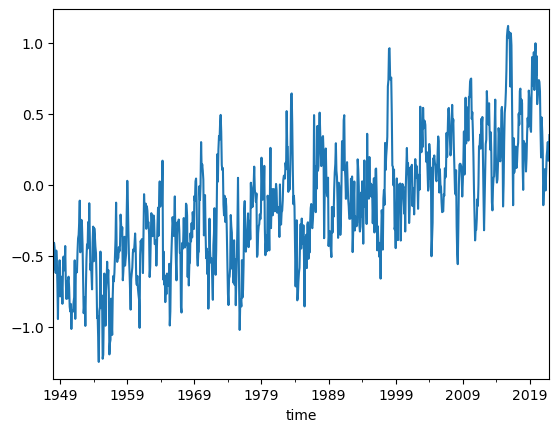

In [58]:
IOD_anoms.sel(IOD='IOD_West').to_pandas().plot()

<AxesSubplot:xlabel='time'>

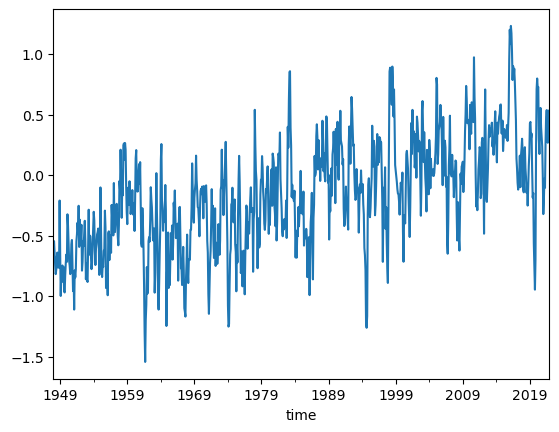

In [59]:
IOD_anoms.sel(IOD='IOD_East').to_pandas().plot()

### calculate the mean and standard deviation over the period 1981 - 2010, then standardize 

In [60]:
ave = IOD_anoms.sel(time=slice(clim_start, clim_end)).mean('time')

In [61]:
std = IOD_anoms.sel(time=slice(clim_start, clim_end)).std('time')

In [63]:
IOD_anoms_std = (IOD_anoms - ave) / std

<AxesSubplot:xlabel='time'>

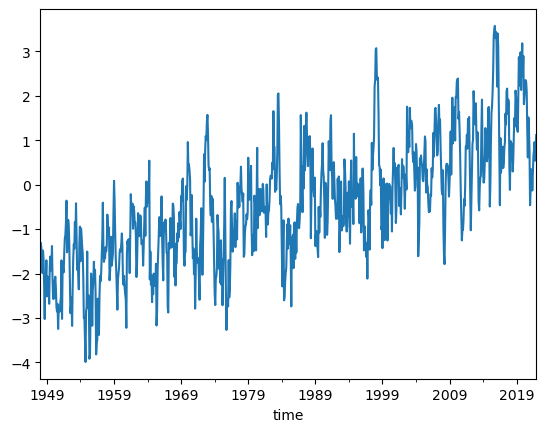

In [64]:
IOD_anoms_std.sel(IOD='IOD_West').to_pandas().plot()

<AxesSubplot:xlabel='time'>

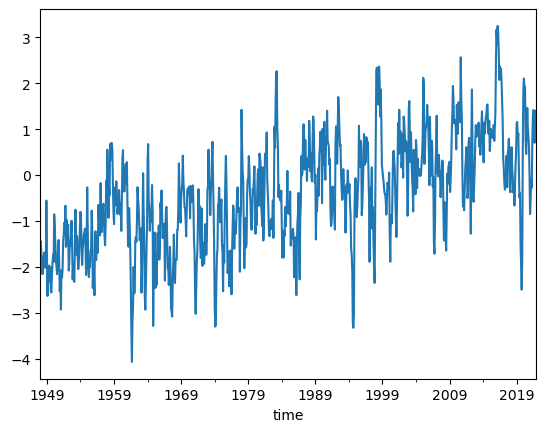

In [65]:
IOD_anoms_std.sel(IOD='IOD_East').to_pandas().plot()

### Now calculate the IOD (West node minus East node )

In [86]:
IOD = IOD_anoms_std.sel(IOD='IOD_West') - IOD_anoms_std.sel(IOD='IOD_East')

In [87]:
IOD = IOD.to_pandas()

In [88]:
IOD = IOD.to_frame(name='DMI')

In [91]:
IOD.head()

,DMI
time,
1948-01-01,-0.442859
1948-02-01,0.131642
1948-03-01,0.285089
1948-04-01,0.205706
1948-05-01,0.173294


In [92]:
IOD.tail()

,DMI
time,
2021-08-01,-0.442595
2021-09-01,0.252306
2021-10-01,-0.867153
2021-11-01,-0.498174
2021-12-01,-0.191092


<AxesSubplot:xlabel='time'>

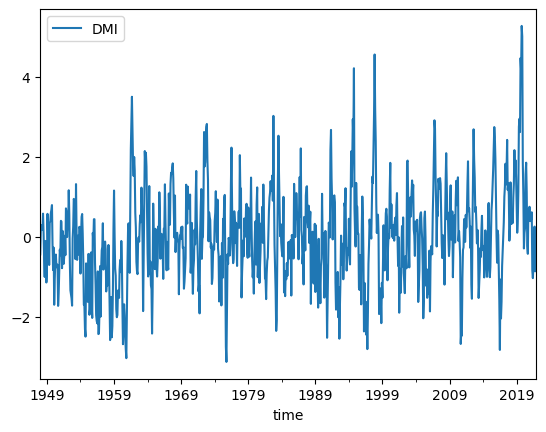

In [93]:
IOD.plot()

### saves to disk 

In [95]:
IOD.to_csv(opath)